<a href="https://colab.research.google.com/github/amol004/Google-Play-Store-EDA/blob/main/Capstone_project_Google_play_store_review_analysis_(EDA)_Notebook_%7BAmol_Thakur%7D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA on Google Play Store**
### **By Amol Thakur**


---



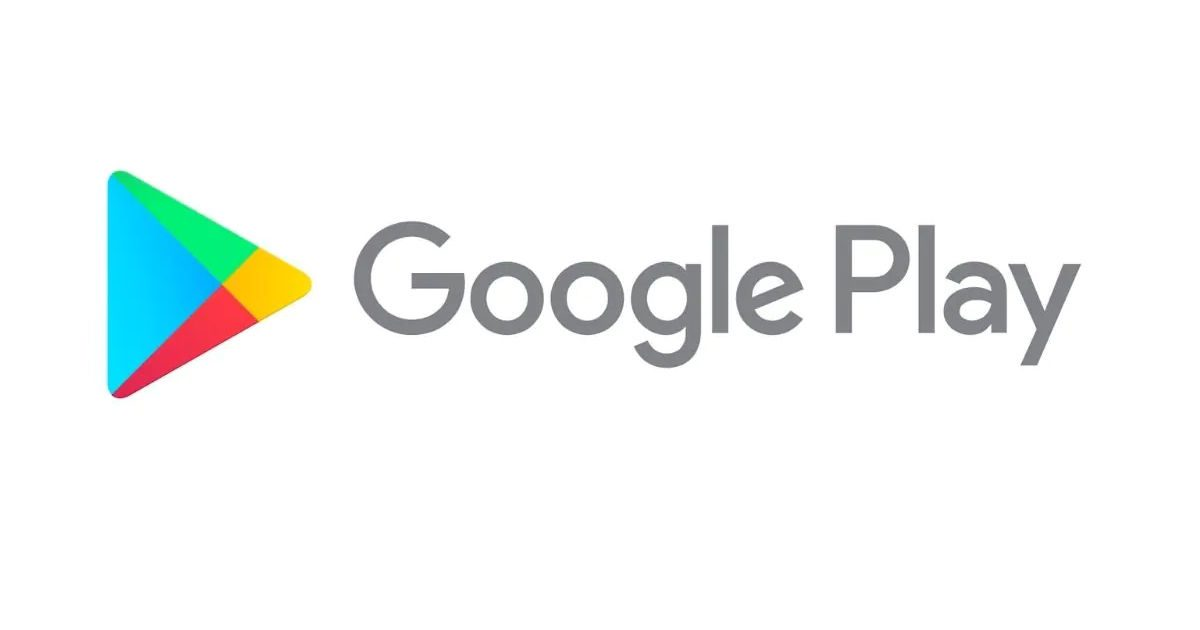



### **The Play Store applications data set(PlayStoreData.csv) offers a lot of promise to help app-making enterprises succeed.**
### **Each row in this collection contains values for its category, rating, size, and other attributes.**
### **Customer reviews of the Android apps are included in another dataset.(UserReviews.csv)**

# There are basically 2 data sets that we will be working on in this project 
1.**PlayStoreData.csv : contains information regarding Applications**

**2. UserReviews.csv : contains information regarding Reviews and Sentiments of users**




# **Let's have a look on our PlayStoreData.csv dataset and the features/information it holds :**


**App :- Name of the App.**

**Category :- The classification that the App belongs in.**

**Rating :- App's rating on playstore.**

**Reviews :- Number of reviews of the App.**

**Size :- Size of the App.**

**Install :- Number of Installs of the App.**

**Type :- Whether the App is free or paid.**

**Price :- Price of the app.**

**Content Rating :- Audience that the app should be targeting.**

**Genres:- Genre under which the App falls.**

**Last Updated :- Date when the App was last updated.**

**Current Ver :- Current Version of the Application.**

**Android Ver :- Minimum Android Version required to run the App.**






# **Now let's study the features of our 2nd dataset which is UserReviews.csv :**

**App : Name of the App.**

**Translated_Review : Opinions of people regarding a specific application**

**Sentiment : Weather the opinion/review of user is negative/positive/neutral**

**Sentiment_Polarity: Defines the orientation of the expressed sentiment(between -1(negative) to 1(positive) or 0(neutral)**

**Sentiment_Subjectivity : Refers to the degree to which a person's review is related to the App (lies between 0 to 1)**


# **The data from Play Store applications has a huge potential to propel app-making companies to success. For developers to work on and take the Android market, actionable insights may be derived.**

# **Therefore, without further ado, let's start our analysis to get some insightful conclusions.**

# **Importing all the necessary packages and libraries required for our EDA** 





In [1]:
# used for numerical operations
import numpy as np
# for data manipulation
import pandas as pd 
# for data vizulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
# for visualizing missing/null values in our data frame
import missingno as msno 
# for manipulation of data with type datetime
from datetime import datetime
# used to remove warnings for better asthetics of our project
import warnings
warnings.filterwarnings('ignore')
# to increase the number of visible columns in our data frame
from google.colab.data_table import DataTable
DataTable.max_columns = 30

In [2]:
#Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Reading our first csv file (PlayStoreData.csv) and storing it in a variable play_df
play_df = pd.read_csv('/content/drive/MyDrive/Google Playstore dataset/Play Store Data.csv')


In [4]:
# Reading our 2nd csv file (UserReviews.scv) and storing it in a variable reviews_df
reviews_df = pd.read_csv('/content/drive/MyDrive/Google Playstore dataset/User Reviews.csv')

In [5]:
#Analyzing top 5 rows of our play_df dataset using .head()
play_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
#Analyzing top 5 rows of our reviews_df dataset using .head()
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


# **For now let's just focus on our 1st dataset i.e play_df and try finding some useful insights**

In [7]:
# checking the data types of every column in our play_df dataframe using .info()
# here we can aslo notice that our play_df dataframe has 10841 rows and 13 columns
play_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# **For performing Data Cleaning following operations would be used :**

## 1. Handling null/missing values
## 2. Finding Outliers
## 3. Correcting Datatypes
## 4. Filtering unnecessary values
## 5. Removing unnecessary symbols ($,+,M etc)
## 6. Removing Duplicate values
## 7. Transforming values from one format to other (from Kb to Mb)




















# Analysing Null/Missing values

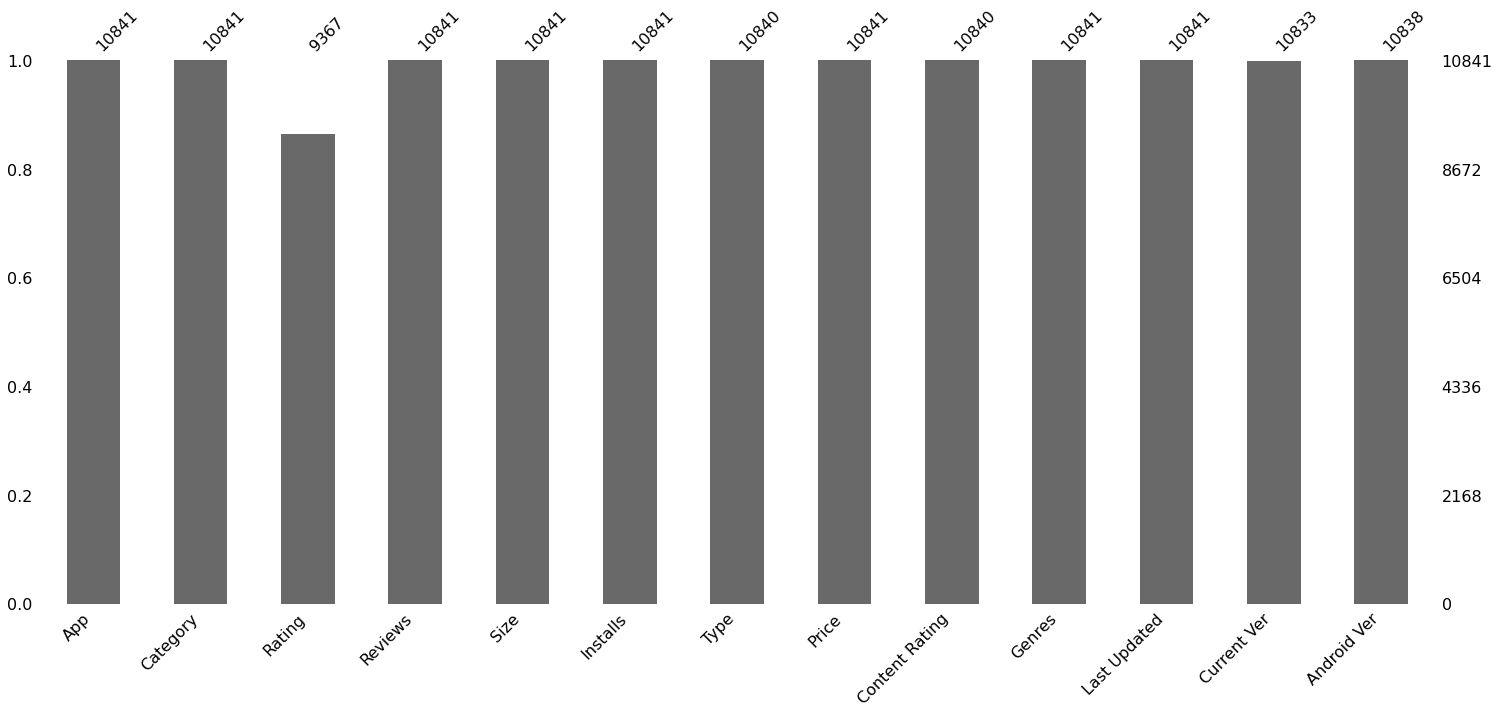

In [8]:
# let's plot all the null values present in our dataframe using bargraph and missingno library
plt.figure(figsize=(10,8)) # used to provide a specific size to our graph
msno.bar(play_df);

<Figure size 720x576 with 0 Axes>

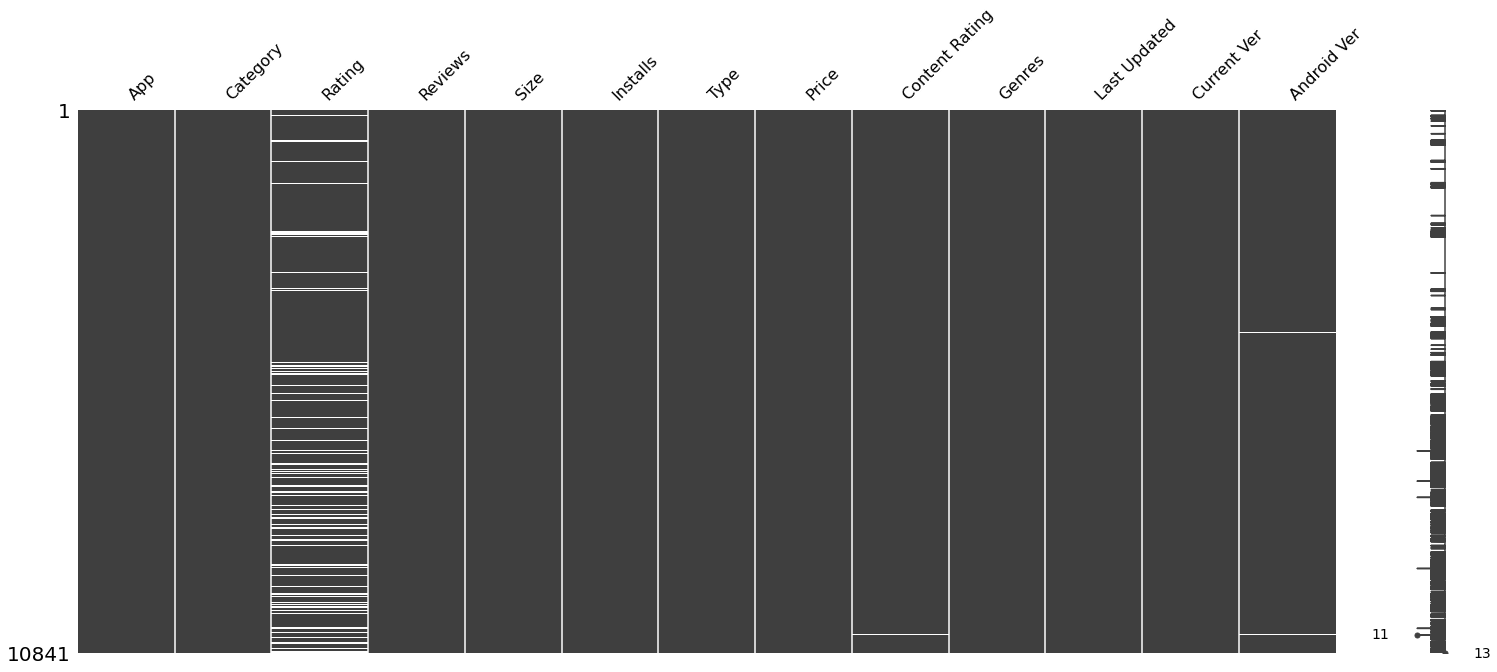

In [9]:
# we can also use the matrix method for performing the above task (the horizontal white lines represents missing values present in columns )
# it seems like there aren't much missing values present in our dataframe except for the column 'Rating'
plt.figure(figsize=(10,8))
msno.matrix(play_df);

In [10]:
#checking the amount of null values present in every column of our playstore dataframe by combining .isnull() and .sum() methods
play_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [11]:
# finding the percentage of null values present in every column of play_df
play_df.isnull().sum()/len(play_df)*100

App                0.000000
Category           0.000000
Rating            13.596532
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009224
Price              0.000000
Content Rating     0.009224
Genres             0.000000
Last Updated       0.000000
Current Ver        0.073794
Android Ver        0.027673
dtype: float64

# Outliers Detection and Removal

In [12]:
# performing a check for any possible outliers by using unique() method
# here we can see a value(19.0) which is far off from max possible value(5.0) which an app can get
play_df.Rating.unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

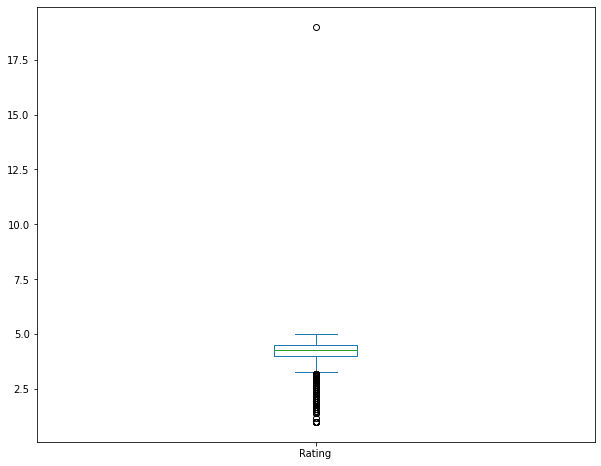

In [14]:
# confirming the above outlier using box plot 
plt.figure(figsize=(10,8))
play_df.Rating.plot(kind='box');

In [15]:
# Removing the above outlier form the column Rating
play_df.drop(play_df[play_df.Rating>5.0].index,inplace=True)

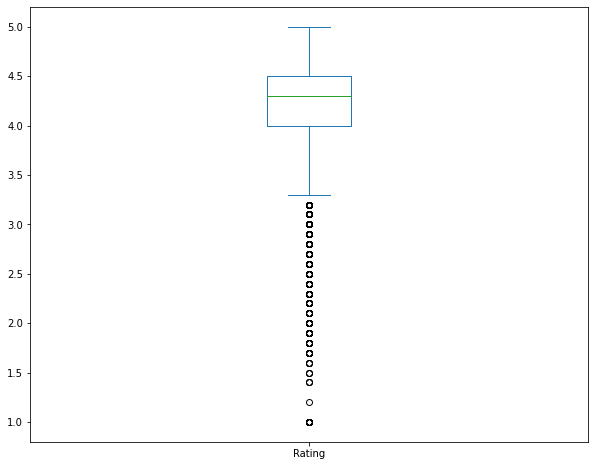

In [17]:
#performing a check just to ensure that the outlier is removed
plt.figure(figsize=(10,8))
play_df.Rating.plot(kind='box');
# here we can see that we have sucessfully removed the outlier from the required column


# Removing duplicate values

In [20]:
# Dropping duplicate values present in our dataframe meanwhile retaining the first value
play_df=play_df.drop_duplicates(keep='first')

In [48]:
#dropping row with 0 Installs using .drop() as it is an outlier and it is not possible for an app to have 0 installs 
# further storing in play_df to update our dataframe
play_df=play_df.drop(play_df[play_df.Installs == '0'].index)
play_df.head(5)

,App,Category,Rating,Reviews,Size(in Mb),Installs,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


# Converting columns into numeric type from str and removing unnecessary signs('$' , '+' , 'M' , 'K' , ',' ) attatched to the values present in our columns (Correcting Datatypes and Removing unnecessary symbols)

In [24]:
# Changing the datatype of column named "Price" to float meanwhile also replacing '$' symbol with empty string
play_df['Price']= play_df['Price'].str.replace('$','').astype('float64')

In [25]:
# Changing the datatype of column 'Rating' to float 
play_df['Rating']=play_df['Rating'].astype('float64')

In [26]:
# Converting the datatype of column 'Installs' to int and also replacing ("+" and ",") with empty string
play_df['Installs']=play_df['Installs'].str.replace('+','')
play_df['Installs']=play_df.Installs.str.replace(',','').astype('int')

In [29]:
# Changing datatype of 'Size' column and replacing string('Varies with device') with np.nan to replace this string with NaN value
# We will not change the datatype of this column for now as there are some symbols which needs to be removed 
# And there are some values too which needs to be converted from Kb to Mb
# we will remove and convert them with the help of a function further in our journey
play_df['Size']=play_df.Size.str.replace('M','')
play_df['Size']=play_df.Size.replace('Varies with device',np.nan)

In [28]:
# updating datatype of column 'Reviews' to int
play_df['Reviews']=play_df.Reviews.astype('int')

In [30]:
# changing the data type of Last Updated column from 'object' to Datetime
play_df['Last Updated'] = pd.to_datetime(play_df['Last Updated'])

In [35]:
# Let's rename our 'Price' column to 'Price($)' and update the value in our play_df dataframe
play_df=play_df.rename(columns={'Price':'Price($)'})

In [36]:
# writing a function to remove 'k' from all the values present in 'Size' column
def remove(i):
        if i[-1]=='k':
            return float(i[0:-1])/1000  #converting values from 'Kb' to 'Mb' by dividing all the values by 1000
        else :
            return i

In [37]:
# changing the datatype of 'Size' column to str so that we can apply the above function as it is only applicabe for a value having datatype str
play_df.Size=play_df['Size'].astype('str')


In [38]:
# applying the function remove() that we created , to the column 'Size' so that we can have pure numeric values
play_df["Size"]=play_df["Size"].apply(lambda x: remove(x)) # using .apply() method with the help of lambda function to filter values in column 'Size'
# we can also use .map() here to perform the same task

In [39]:
#Now let's just verfiying weather we have got the desired results or not
play_df.Size.unique()
# it seems that all our values are puerly numeric now , so let's change the datatype of this column

array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '2.7', '5.5', '17', '39', '31', '4.2',
       '7.0', '23', '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24', 'nan',
       '9.4', '15', '10', '1.2', '26', '8.0', '7.9', '56', '57', '35',
       '54', 0.201, '3.6', '5.7', '8.6', '2.4', '27', '2.5', '16', '3.4',
       '8.9', '3.9', '2.9', '38', '32', '5.4', '18', '1.1', '2.2', '4.5',
       '9.8', '52', '9.0', '6.7', '30', '2.6', '7.1', '3.7', '22', '7.4',
       '6.4', '3.2', '8.2', '9.9', '4.9', '9.5', '5.0', '5.9', '13', '73',
       '6.8', '3.5', '4.0', '2.3', '7.2', '2.1', '42', '7.3', '9.1', '55',
       0.023, '6.5', '1.5', '7.5', '51', '41', '48', '8.5', '46', '8.3',
       '4.3', '4.7', '3.3', '40', '7.8', '8.8', '6.6', '5.1', '61', '66',
       0.079, '8.4', 0.118, '44', 0.695, '1.6', '6.2', 0.018, '53', '1.4',
       '3.0', '5.8', '3.8', '9.6', '45', '63', '49', '77', '4.4', '4.8',
       '70', '6.9', '9.3', '10.0', '8.1', '36',

In [41]:
#changing the datatype of column 'Size' to float 
play_df['Size']=play_df['Size'].astype('float')

In [42]:
# renaming the column as all the values now are in 'Mb'
play_df=play_df.rename(columns={'Size':'Size(in Mb)'})

In [45]:
# Let's have a final look at our updated dataframe before moving further  
play_df.head()

,App,Category,Rating,Reviews,Size(in Mb),Installs,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [46]:
# Here we can see that the datatype of our columns have changed to 'float64','int64' and 'datetime' from 'object/str' as we desired
play_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10356 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10356 non-null  object        
 1   Category        10356 non-null  object        
 2   Rating          8892 non-null   float64       
 3   Reviews         10356 non-null  int64         
 4   Size(in Mb)     8831 non-null   float64       
 5   Installs        10356 non-null  int64         
 6   Type            10356 non-null  object        
 7   Price($)        10356 non-null  float64       
 8   Content Rating  10356 non-null  object        
 9   Genres          10356 non-null  object        
 10  Last Updated    10356 non-null  datetime64[ns]
 11  Current Ver     10348 non-null  object        
 12  Android Ver     10354 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.4+ MB


### **The first part of our analysis ends here which was Data Cleaning.**
### **Our Data is now good enough to draw some insights from it , so let's move ahead in our journey.**



---


# **Data Visualization**







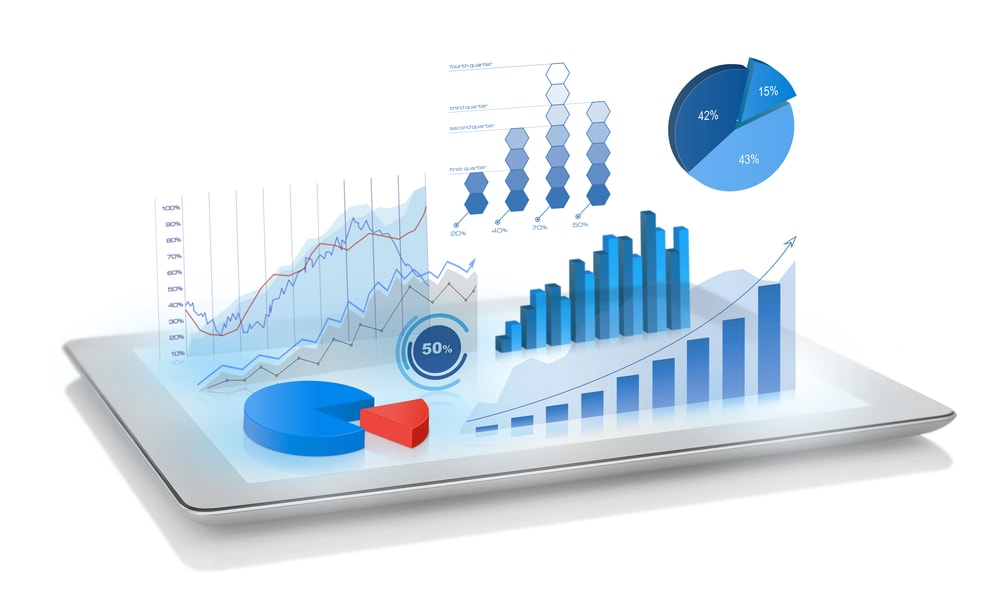





### **Before moving any further with our analysis the first question that we would like to know is what do we actually mean by the term 'data visualization' ?**
### **The answer is simple,Data visualisation is a method of presenting information graphically, emphasising patterns and trends in data, and assisting the reader in gaining rapid insights as not all of us might be good in understanding complex set of codes.**

# **Visualizations used in this project:**
1.Violin Plot       

2.Hist Plot

3.Count Plot

4.Bar Graph

5.Pie Chart

6.Kde Plot

7.Scatter Plot

8.Line Graph

9.Correlation Heatmap

10.Box Plot

11.Dist Plot

12.Pair Plot